In [14]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [15]:
deals= pd.read_csv('Sample_Data_Deals2.csv')
#Change column type from Object to Category for columns 3,4,5
for col in ['Country', 'Industry', 'Deal Status']:
    deals[col] = deals[col].astype('category')

In [16]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OrderID        100 non-null    object  
 1   OrderQuantity  100 non-null    int64   
 2   OrderValue     100 non-null    int64   
 3   Country        100 non-null    category
 4   Industry       100 non-null    category
 5   Deal Status    100 non-null    category
dtypes: category(3), int64(2), object(1)
memory usage: 3.4+ KB


In [17]:
#Drop Order ID
deals1 = pd.DataFrame(deals.iloc[:,1:])
deals1.head()

,OrderQuantity,OrderValue,Country,Industry,Deal Status
0,371,383,Canada,Technology,Won
1,163,121,Canada,Finance,Won
2,191,117,Australia,Manufacturing,Lost
3,150,143,Australia,Manufacturing,Lost
4,165,148,Australia,Manufacturing,Lost


In [18]:
#Encoding categorical data, drop orderID
#Encoding categorical data, 
Country = {'Australia': 1, 'Canada':2, 'China':3, 'France':4, 'Germany':5}
deals1['Country'] = deals1['Country'].map(Country)

Industry = {'Energy':1, 'Finance':2, 'Government':3, 'Healthcare':4, 'Manufacturing':5, 'Retail':6, 'Technology':7}
deals1['Industry'] = deals1['Industry'].map(Industry)

dealstat= {'Won':1, 'Lost':0}
deals1['Deal Status'] = deals1['Deal Status'].map(dealstat)

print(deals1.head())

   OrderQuantity  OrderValue Country Industry Deal Status
0            371         383       2        7           1
1            163         121       2        2           1
2            191         117       1        5           0
3            150         143       1        5           0
4            165         148       1        5           0


In [19]:
#Create x and y datasets
X = deals1.drop('Deal Status',axis=1).values
y = deals1['Deal Status'].values

In [20]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
#Transform your data
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ScikitLearn Classifiers

In [22]:
logreg = LogisticRegression()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_estimators=1000)
knn_classifier = KNeighborsClassifier(5)

In [26]:
logreg.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
#Predict
logreg_pred = logreg.predict(X_test)
svm_pred = svm_classifier.predict(X_test)
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
knn_pred = knn_classifier.predict(X_test)

In [56]:
#Eval
logreg_acc = np.hstack([accuracy_score(y_test, logreg_pred)])
svm_acc = np.hstack([accuracy_score(y_test, svm_pred)])
dt_acc = np.hstack([accuracy_score(y_test, dt_pred)])
rf_acc = np.hstack([accuracy_score(y_test, rf_pred)])
knn_acc = np.hstack([accuracy_score(y_test, knn_pred)])

In [52]:
acc_full=np.concatenate((logreg_acc,svm_acc,dt_acc,rf_acc,knn_acc))

   LogReg  SVM    DT    RF   KNN
0    0.64  0.6  0.44  0.52  0.56


<Axes: >

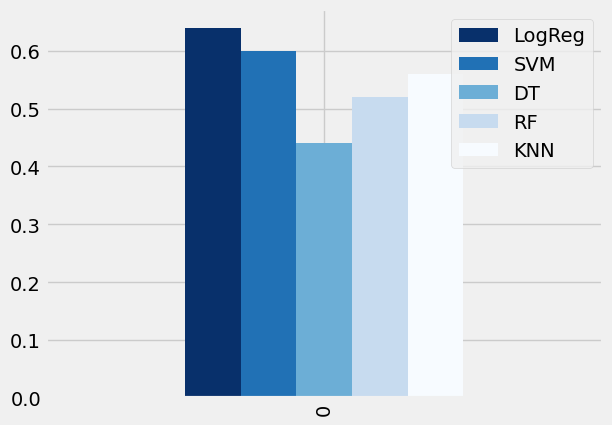

In [80]:
acc_full_df=(pd.DataFrame(acc_full)).transpose()
acc_full_df.columns = (['LogReg', 'SVM', 'DT', 'RF', 'KNN'])
print(acc_full_df)
acc_full_df.plot(kind='bar', cmap='Blues_r')